# Test Code

In [1]:
from class_non_Smoker import Non_Smoker_Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

n_longitudinal = 6
#a = Non_Smoker_Analysis()

In [ ]:
'R_De', 'R_Lo', 'R_Di', 'R_De_Lu', 'Radiomics', 'R_LU','R_Lu_De','All'

## Main Code

In [51]:
n_iter = 100
n_longitudinal = 6
labels_to_be_done = ['R_De', 'R_Lo', 'R_Di', 'R_De_Lu',  'All', 'All2','Radiomics2']
labels_done = ["Radiomics", 'R_Lu']

In [3]:
label = 'R_De'

if label in labels_to_be_done:

    performance = {}
    performance_distinct = {}
    for i in range(n_iter):
        ns = Non_Smoker_Analysis(print_info=False)
        # Features
        radiomic_features = ns.select_radiomic_features(method="ward", metric='euclidean', plot=False, print_info = False)
        #lung_feature = ns.select_lung_feature()
        #longitudinal_features = ns.selected_longitudinal_features(n_longitudinal=n_longitudinal)
        #diff_features = ns.select_diff_features()
        ns.get_dummies_pre_rsf()
        demog_features = ns.demog_features

        features = radiomic_features + demog_features

        p, p_d = ns.random_survival_forest_gs(features, itter=i, label=label) #notice the i here

        for key, value in p.items(): #next(iter(dict.items()))
            performance[key] = value

        for keyd, valued in p_d.items():
            performance_distinct[keyd] = valued

        if i%49==0:
            print(label, ' ',i, "- on tests:" , value, valued)

    # Save as CSV
    with open('performance_distinct_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance_distinct.items():
            writer.writerow([key, value])
    with open('performance_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance.items():
            writer.writerow([key, value])

/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:756: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  UserWarning,


R_De   0 - on tests: 0.5794187534271614 0.6416711530692333


/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:756: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  UserWarning,
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:756: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  UserWarning,


R_De   49 - on tests: 0.6265761396702231 0.6144811154467198
R_De   98 - on tests: 0.7497702205882353 0.7450713275007033


In [4]:
label = 'R_Lo'
if label in labels_to_be_done:
    performance = {}
    performance_distinct = {}
    for i in range(n_iter):
        ns = Non_Smoker_Analysis(print_info=False)
        # Features
        radiomic_features = ns.select_radiomic_features(method="ward", metric='euclidean', plot=False, print_info = False)
        #lung_feature = ns.select_lung_feature()
        longitudinal_features = ns.selected_longitudinal_features(n_longitudinal=n_longitudinal)
        #diff_features = ns.select_diff_features()
        #ns.get_dummies_pre_rsf()
        #demog_features = ns.demog_features

        features = radiomic_features + longitudinal_features

        p, p_d = ns.random_survival_forest_gs(features, itter=i, label=label) #notice the i here

        for key, value in p.items(): #next(iter(dict.items()))
            performance[key] = value

        for keyd, valued in p_d.items():
            performance_distinct[keyd] = valued
            
        if i%49==0:
            print(label, ' ',i, "- on tests:" , value, valued)

    # Save as CSV
    with open('performance_distinct_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance_distinct.items():
            writer.writerow([key, value])
    with open('performance_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance.items():
            writer.writerow([key, value])

R_Lo   0 - on tests: 0.7338077557755776 0.6456434562250174


/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column 1_year_risk have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[eve

R_Lo   49 - on tests: 0.7534589933827953 0.6636780776434048


/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column 1_year_risk have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, '1_year_risk'].var())
>>> print(df.loc[~events, '1_year_risk'].var())

A very low variance means that the column 1_year_risk completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column 1_year_risk have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of '

/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifel

R_Lo   98 - on tests: 0.6617756512493355 0.6510657901777072


In [5]:
label = 'R_Di'
if label in labels_to_be_done:
    performance = {}
    performance_distinct = {}
    for i in range(n_iter):
        ns = Non_Smoker_Analysis(print_info=False)
        # Features
        radiomic_features = ns.select_radiomic_features(method="ward", metric='euclidean', plot=False, print_info = False)
        #lung_feature = ns.select_lung_feature()
        #longitudinal_features = ns.selected_longitudinal_features(n_longitudinal=n_longitudinal)
        diff_features = ns.select_diff_features()
        #ns.get_dummies_pre_rsf()
        #demog_features = ns.demog_features

        features = radiomic_features + diff_features

        p, p_d = ns.random_survival_forest_gs(features, itter=i, label=label) #notice the i here

        for key, value in p.items(): #next(iter(dict.items()))
            performance[key] = value

        for keyd, valued in p_d.items():
            performance_distinct[keyd] = valued
            
        if i%49==0:
            print(label, ' ',i, "- on tests:" , value, valued)

    # Save as CSV
    with open('performance_distinct_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance_distinct.items():
            writer.writerow([key, value])
    with open('performance_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance.items():
            writer.writerow([key, value])

R_Di   0 - on tests: 0.7254478072884497 0.7119788463483495


/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:756: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  UserWarning,
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/scipy/cluster/vq.py:607: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


R_Di   49 - on tests: 0.6963696369636964 0.7146224366474809
R_Di   98 - on tests: 0.6156785057308618 0.6475201293468512


In [38]:
label = 'R_De_Lu'
if label in labels_to_be_done:
    performance = {}
    performance_distinct = {}
    for i in range(n_iter):
        ns = Non_Smoker_Analysis(print_info=False)
        # Features
        radiomic_features = ns.select_radiomic_features(method="ward", metric='euclidean', plot=False, print_info = False)
        lung_feature = ns.select_lung_feature()
        longitudinal_features = ns.selected_longitudinal_features(n_longitudinal=n_longitudinal)
        diff_features = ns.select_diff_features()
        ns.get_dummies_pre_rsf()
        demog_features = ns.demog_features

        features = radiomic_features + demog_features + lung_feature 

        p, p_d = ns.random_survival_forest_gs(features, itter=i, label=label) #notice the i here

        for key, value in p.items(): #next(iter(dict.items()))
            performance[key] = value

        for keyd, valued in p_d.items():
            performance_distinct[keyd] = valued
        if i%49==0:
            print(label, ' ',i, "- on tests:" , value, valued)

    # Save as CSV
    with open('performance_distinct_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance_distinct.items():
            writer.writerow([key, value])
    with open('performance_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance.items():
            writer.writerow([key, value])

/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)


R_De_Lu   0 - on tests: 0.713531669865643 0.6933384660642338


/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifel

R_De_Lu   49 - on tests: 0.6256983240223464 0.6844830366060989


/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifel

R_De_Lu   98 - on tests: 0.6571428571428571 0.7151961664538291


In [ ]:
# label = 'R_De_Lu_lo'
# if label in labels_to_be_done:
#     performance = {}
#     performance_distinct = {}
#     for i in range(n_iter):
#         ns = Non_Smoker_Analysis(print_info=False)
#         # Features
#         radiomic_features = ns.select_radiomic_features(method="ward", metric='euclidean', plot=False, print_info = False)
#         lung_feature = ns.select_lung_feature()
#         longitudinal_features = ns.selected_longitudinal_features(n_longitudinal=n_longitudinal)
#         diff_features = ns.select_diff_features()
#         ns.get_dummies_pre_rsf()
#         demog_features = ns.demog_features

#         features = radiomic_features + lung_feature + longitudinal_features + diff_features + demog_features

#         p, p_d = ns.random_survival_forest_gs(features, itter=i, label=label) #notice the i here

#         for key, value in p.items(): #next(iter(dict.items()))
#             performance[key] = value

#         for keyd, valued in p_d.items():
#             performance_distinct[keyd] = valued
#         if i%49==0:
#             print(label, ' ',i, "- on tests:" , value, valued)

#     # Save as CSV
#     with open('performance_distinct_'+ label +'.csv', 'w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         for key, value in performance_distinct.items():
#             writer.writerow([key, value])
#     with open('performance_'+ label +'.csv', 'w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         for key, value in performance.items():
#             writer.writerow([key, value])

**Radiomics**

In [ ]:
label = 'Radiomics2'
if label in labels_to_be_done:
    performance = {}
    performance_distinct = {}
    for i in range(n_iter):
        ns = Non_Smoker_Analysis(print_info=False)
        radiomic_features = ns.select_radiomic_features(method="ward", metric='euclidean', plot=False, print_info = False)

        p, p_d = ns.random_survival_forest_gs(radiomic_features, itter=i, label=label) #notice the i here

        for key, value in p.items(): #next(iter(dict.items()))
            performance[key] = value

        for keyd, valued in p_d.items():
            performance_distinct[keyd] = valued

        if i%49==0:
            print(label, ' ',i, "- on tests:" , value, valued)

    # Save as CSV
    with open('performance_distinct_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance_distinct.items():
            writer.writerow([key, value])
    with open('performance_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance.items():
            writer.writerow([key, value])

/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:756: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  UserWarning,


Radiomics2   0 - on tests: 0.7226345083487941 0.6840272708486952


**Radiomic Lung**

In [8]:
label = 'R_LU'
if label in labels_to_be_done:
    performance = {}
    performance_distinct = {}
    for i in range(n_iter):
        ns = Non_Smoker_Analysis(print_info=False)
        # Features
        radiomic_features = ns.select_radiomic_features(method="ward", metric='euclidean', plot=False, print_info = False)
        lung_feature = ns.select_lung_feature()

        features = radiomic_features + lung_feature

        p, p_d = ns.random_survival_forest_gs(features, itter=i, label=label) #notice the i here

        for key, value in p.items(): #next(iter(dict.items()))
            performance[key] = value

        for keyd, valued in p_d.items():
            performance_distinct[keyd] = valued

        if i%49==0:
            print(label, ' ',i, "- on tests:" , value, valued)

    # Save as CSV
    with open('performance_distinct_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance_distinct.items():
            writer.writerow([key, value])
    with open('performance_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance.items():
            writer.writerow([key, value])

**R lu de**

In [9]:
# label = 'R_Lu_De'
# if label in labels_to_be_done:

#     performance = {}
#     performance_distinct = {}
#     for i in range(n_iter):
#         ns = Non_Smoker_Analysis(print_info=False)
#         # Features
#         radiomic_features = ns.select_radiomic_features(method="ward", metric='euclidean', plot=False, print_info = False)
#         lung_feature = ns.select_lung_feature()
#         #longitudinal_features = ns.selected_longitudinal_features(n_longitudinal=n_longitudinal)
#         #diff_features = ns.select_diff_features()
#         features = radiomic_features + lung_feature + longitudinal_features + diff_features

#         p, p_d = ns.random_survival_forest_gs(features, itter=i, label=label) #notice the i here

#         for key, value in p.items(): #next(iter(dict.items()))
#             performance[key] = value

#         for keyd, valued in p_d.items():
#             performance_distinct[keyd] = valued

#         if i%49==0:
#             print(label, ' ',i, "- on tests:" , value, valued)

#     # Save as CSV
#     with open('performance_distinct_'+ label +'.csv', 'w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         for key, value in performance_distinct.items():
#             writer.writerow([key, value])
#     with open('performance_'+ label +'.csv', 'w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         for key, value in performance.items():
#             writer.writerow([key, value])

**All**

In [48]:
label = 'All2'
if label in labels_to_be_done:
    performance = {}
    performance_distinct = {}
    for i in range(n_iter):
        ns = Non_Smoker_Analysis(print_info=False)
        # Features
        radiomic_features = ns.select_radiomic_features(method="ward", metric='euclidean', plot=False, print_info = False)
        lung_feature = ns.select_lung_feature()
        longitudinal_features = ns.selected_longitudinal_features(n_longitudinal=n_longitudinal)
        diff_features = ns.select_diff_features()
        ns.get_dummies_pre_rsf()
        demog_features = ns.demog_features

        features = radiomic_features + lung_feature + longitudinal_features + diff_features + demog_features

        p, p_d = ns.random_survival_forest_gs(features, itter=i, label=label) #notice the i here

        for key, value in p.items(): #next(iter(dict.items()))
            performance[key] = value

        for keyd, valued in p_d.items():
            performance_distinct[keyd] = valued

        if i%49==0:
            print(label, ' ',i, "- on tests:" , value, valued)

    # Save as CSV
    with open('performance_distinct_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance_distinct.items():
            writer.writerow([key, value])
    with open('performance_'+ label +'.csv', 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in performance.items():
            writer.writerow([key, value])

/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:756: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  UserWarning,


All2   0 - on tests: 0.6898361495135689 0.6842342002510824


/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in %d steps." % max_steps, ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifel

All2   49 - on tests: 0.7214139454682617 0.6962963860118999


/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column 1_year_risk have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['event'].astype(bool)
>>> print(df.loc[events, '1_year_risk'].var())
>>> print(df.loc[~events, '1_year_risk'].var())

A very low variance means that the column 1_year_risk completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
/home/msalehjahromi/miniconda/envs/py37/lib/python3.7/site-packages/lifelines/fitters/cox_time_varying_fitter.py:494: ConvergenceWarning: Newton-Raphson failed to converge sufficiently in 50 steps.
  warnings.warn("Newton-Raphson failed to converge sufficiently in

All2   98 - on tests: 0.6824601366742596 0.6922320206004281


## Box Plot

len(data_combined) =  3


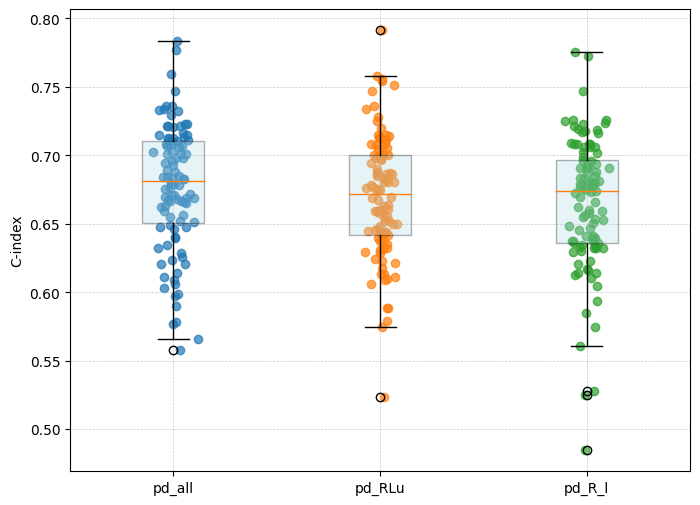

In [14]:
import pandas as pd

def give_list(df_o, startswith):
    df = df_o.copy()
    original_first_row = df.columns.tolist()
    df.columns = range(df.shape[1])
    first_row_as_data = pd.DataFrame([original_first_row], columns=df.columns)
    df_temp = pd.concat([first_row_as_data, df], ignore_index=True)
    df_list = df_temp[df_temp[0].str.startswith(startswith)][1].tolist()
    return df_list


p_RLu = pd.read_csv('performance_R_LU.csv')
pd_RLu = pd.read_csv('performance_distinct_R_LU.csv')
p_all = pd.read_csv('performance_alll.csv')
pd_all = pd.read_csv('performance_distinct_alll.csv')
p_R = pd.read_csv('performance_Radiomics.csv')
pd_R = pd.read_csv('performance_distinct_Radiomics.csv')


p_RLu_l = give_list(p_RLu, 'ts')
pd_RLu_l = give_list(pd_RLu, 'ts')
p_all_l = give_list(p_all, 'ts')
pd_all_l = give_list(pd_all, 'ts')
p_R_l = give_list(p_R, 'ts')
pd_R_l = give_list(pd_R, 'ts')



data_combined = [p_all_l, pd_all_l, p_RLu_l, pd_RLu_l,  p_R_l , pd_R_l]
labels = ['p_all', 'pd_all', 'p_RLu', 'pd_RLu', 'p_R' , 'pd_R_l']


data_combined = [pd_all_l, pd_RLu_l,  pd_R_l]
labels = [ 'pd_all', 'pd_RLu' , 'pd_R_l']

# Create the box plot
print("len(data_combined) = ", len(data_combined))
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
boxplot = plt.boxplot(data_combined, patch_artist=True, labels=labels, positions=np.arange(1, len(data_combined)+1))

# Customize boxplot to be transparent
for patch in boxplot['boxes']:
    patch.set_facecolor('lightblue')  # Choose any color you like
    patch.set_alpha(0.3)  # Adjust alpha for transparency, e.g., 0.5 for semi-transparent

# Add scatter plot for each set of data
for i, data in enumerate(data_combined):
    x = np.random.normal(i + 1, 0.04, size=len(data))  # Slight offset on the x-axis for the scatter plot
    plt.scatter(x, data, alpha=0.7)  # alpha controls the transparency

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Customize grid as needed

# Add titles and labels
#plt.title('Box Plot with Transparent Boxes')
plt.ylabel('C-index')

# Show the plot
plt.show()

len(data_combined) =  7


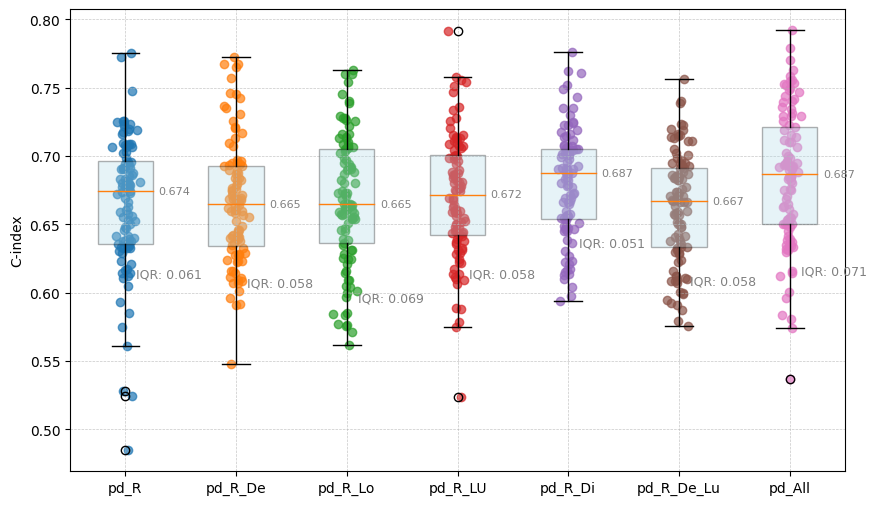

In [50]:
import pandas as pd

def give_list(df_o, startswith):
    df = df_o.copy()
    original_first_row = df.columns.tolist()
    df.columns = range(df.shape[1])
    first_row_as_data = pd.DataFrame([original_first_row], columns=df.columns)
    df_temp = pd.concat([first_row_as_data, df], ignore_index=True)
    df_list = df_temp[df_temp[0].str.startswith(startswith)][1].tolist()
    return df_list


'R_De', 'R_Lo', 'R_Di', 'R_De_Lu', 'Radiomics', 'R_LU','R_Lu_De','All'
pd_R_De = pd.read_csv('performance_distinct_R_De.csv')
pd_R_Lo = pd.read_csv('performance_distinct_R_Lo.csv')
pd_R_Di = pd.read_csv('performance_distinct_R_Di.csv')
pd_R_De_Lu = pd.read_csv('performance_distinct_R_De_Lu.csv')
pd_R = pd.read_csv('performance_distinct_Radiomics.csv')
pd_R_LU = pd.read_csv('performance_distinct_R_LU.csv')
pd_All = pd.read_csv('performance_distinct_All2.csv')
#pd_R_Lu_De = pd.read_csv('performance_distinct_R_Lu_De.csv')

pd_R_l = give_list(pd_R, 'ts')
pd_R_De_l = give_list(pd_R_De, 'ts')
pd_R_Lo_l = give_list(pd_R_Lo, 'ts')
pd_R_LU_l = give_list(pd_R_LU, 'ts')
pd_R_Di_l = give_list(pd_R_Di, 'ts')
pd_R_De_Lu_l = give_list(pd_R_De_Lu, 'ts')

pd_All_l = give_list(pd_All, 'ts')



data_combined = [pd_R_l, pd_R_De_l, pd_R_Lo_l, pd_R_LU_l,  pd_R_Di_l , pd_R_De_Lu_l, pd_All_l]
labels = ['pd_R', 'pd_R_De', 'pd_R_Lo', 'pd_R_LU',  'pd_R_Di' , 'pd_R_De_Lu', 'pd_All']

# Create the box plot
print("len(data_combined) = ", len(data_combined))
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
boxplot = plt.boxplot(data_combined, patch_artist=True, labels=labels, positions=np.arange(1, len(data_combined)+1))

# Customize boxplot to be transparent
for patch in boxplot['boxes']:
    patch.set_facecolor('lightblue')  # Choose any color you like
    patch.set_alpha(0.3)  # Adjust alpha for transparency, e.g., 0.5 for semi-transparent

 
    
    
# Add scatter plot for each set of data
for i, data in enumerate(data_combined):
    x = np.random.normal(i + 1, 0.04, size=len(data))  # Slight offset on the x-axis for the scatter plot
    plt.scatter(x, data, alpha=0.7)  # alpha controls the transparency
    # Calculate and annotate the median value
    median_val = np.median(data)
    plt.text(i + 1.3, median_val, f'{median_val:.3f}', verticalalignment='center',fontsize=8, color='gray')
    iqr_val = np.percentile(data, 75) - np.percentile(data, 25) # Interquartile Range (IQR) 
    plt.text(i + 1.1, median_val - iqr_val, f'IQR: {iqr_val:.3f}', verticalalignment='center', fontsize=9, color='gray')
    #std_val = np.std(data)
    #plt.text(i + 1.1, median_val - std_val, f'Std: {std_val:.3f}', verticalalignment='center',fontsize=8, color='gray')


plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Customize grid as needed

#plt.title('Box Plot with Transparent Boxes')
plt.ylabel('C-index')

# Show the plot
plt.show()

In [ ]:
## Importtance of features
    #radiomic
    #Radiomic and diff
    #All
    
## Selected features
    
## Survival plot based o median


## My own plot green to red 